# **Importing the Libraries**

In [ ]:
!sudo pip3 install keras

In [ ]:
import tensorflow as tf
from tensorflow import keras
from keras import Sequential
from keras import layers
from keras.layers import Dense,Conv2D,MaxPooling2D,Flatten,BatchNormalization,Dropout,Input

# **Part 1: Image Preprocessing**

In [ ]:
train_ds = keras.utils.image_dataset_from_directory(
    directory = '/content/drive/MyDrive/Cats-v-Dogs-Classification/Dataset/train',
    labels= 'inferred',
    label_mode = 'int',
    batch_size = 32,
    image_size = (256,256)
)

validation_ds = keras.utils.image_dataset_from_directory(
    directory = '/content/drive/MyDrive/Cats-v-Dogs-Classification/Dataset/test',
    labels = 'inferred',
    label_mode = 'int',
    batch_size = 32,
    image_size = (256,256)
)

Found 20000 files belonging to 2 classes.
Found 5000 files belonging to 2 classes.


In [ ]:
#Noramlize
def process(image,label):
  image = tf.cast(image/255. ,tf.float32)
  return image , label

train_ds = train_ds.map(process)
validation_ds = validation_ds.map(process)

# **Part 2: Building the CNN**

In [ ]:
# Initializing the CNN model
clf = Sequential()

## **Adding Layers:**

* 1. Convolution (Conv2D).
* 2. Max Pooling (MaxPooling2D).
* 3. Flatten.
* 4. Fully Connected Layers (Dense).

In [ ]:
clf.add(Input(shape=(256,256,3)))

In [ ]:
# 1. Convolution Layer
clf.add(Conv2D(32, kernel_size=(3,3), activation='relu', padding='valid'))

# Batch Normalization to improve training
clf.add(BatchNormalization())

# 2. Max Pooling Layer
clf.add(MaxPooling2D(pool_size=(2,2), strides=2, padding='valid'))

In [ ]:
# 1. Convolution Layer
clf.add(Conv2D(64, kernel_size=(3,3), activation='relu', padding='valid'))

# Batch Normalization to improve training
clf.add(BatchNormalization())

# 2. Max Pooling Layer
clf.add(MaxPooling2D(pool_size=(2,2), strides=2, padding='valid'))

In [ ]:
# 1. Convolution Layer
clf.add(Conv2D(128, kernel_size=(3,3), activation='relu', padding='valid'))

# Batch Normalization to improve training
clf.add(BatchNormalization())

# 2. Max Pooling Layer
clf.add(MaxPooling2D(pool_size=(2,2), strides=2, padding='valid'))

In [ ]:
# Adding Flatten Layer
clf.add(Flatten())

In [ ]:
# Adding the Fully Connected Layers
clf.add(Dense(128,activation='relu'))
clf.add(Dropout(0.1))
clf.add(Dense(64,activation='relu'))
clf.add(Dropout(0.1))
clf.add(Dense(1,activation='sigmoid'))

In [ ]:
clf.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 254, 254, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization                  │ (None, 254, 254, 32)        │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 127, 127, 32)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 125, 125, 64)        │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_1                │ (None, 125, 125, 64)        │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 62, 62, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 60, 60, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_2                │ (None, 60, 60, 128)         │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 30, 30, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 115200)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │      14,745,728 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 1)                   │              65 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 14,848,193 (56.64 MB)

 Trainable params: 14,847,745 (56.64 MB)

 Non-trainable params: 448 (1.75 KB)

# **Part 3: Compiling and Fitting the CNN model**

In [ ]:
clf.compile(optimizer='adam', loss='binary_crossentropy', metrics= ['accuracy'])

In [ ]:
history = clf.fit(train_ds,epochs=10,validation_data = validation_ds)

Epoch 1/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 3440s 5s/step - accuracy: 0.5604 - loss: 2.3374 - val_accuracy: 0.6528 - val_loss: 0.6317
Epoch 2/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 98s 150ms/step - accuracy: 0.6523 - loss: 0.6403 - val_accuracy: 0.6748 - val_loss: 0.5975
Epoch 3/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 97s 155ms/step - accuracy: 0.7157 - loss: 0.5686 - val_accuracy: 0.7314 - val_loss: 0.5418
Epoch 4/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 100s 160ms/step - accuracy: 0.7573 - loss: 0.5055 - val_accuracy: 0.7562 - val_loss: 0.5071
Epoch 5/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 99s 158ms/step - accuracy: 0.7825 - loss: 0.4643 - val_accuracy: 0.7720 - val_loss: 0.4837
Epoch 6/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 140s 155ms/step - accuracy: 0.8113 - loss: 0.4079 - val_accuracy: 0.7924 - val_loss: 0.4673
Epoch 7/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 95s 152ms/step - accuracy: 0.8362 - loss: 0.3643 - val_accuracy: 0.8052 - val_loss: 0.4932
Epoch 8/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 144s 155ms/step - accuracy: 0.8670 - loss:

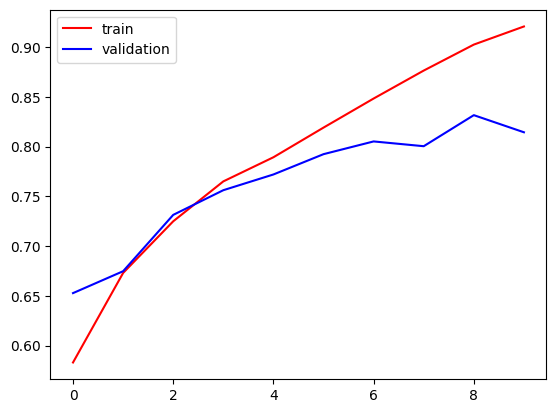

In [ ]:
import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'],color='red',label='train')
plt.plot(history.history['val_accuracy'],color='blue',label='validation')
plt.legend()
plt.show()

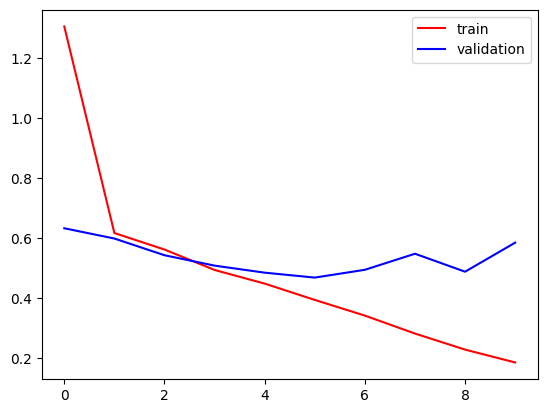

In [ ]:
plt.plot(history.history['loss'],color='red',label='train')
plt.plot(history.history['val_loss'],color='blue',label='validation')
plt.legend()
plt.show()

# **Testing the CNN Model**

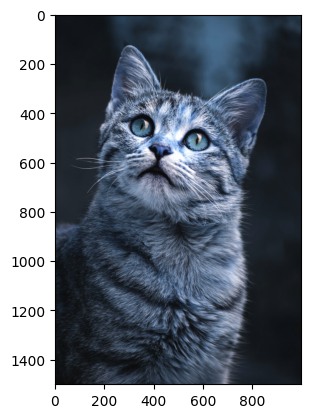

In [ ]:
import cv2
test_img = cv2.imread('/content/drive/MyDrive/Cats-v-Dogs-Classification/cat.jpg')
plt.imshow(test_img)

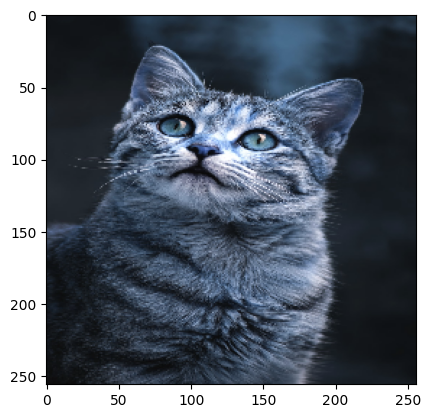

In [ ]:
test_img = cv2.resize(test_img,(256,256))
plt.imshow(test_img)

In [ ]:
test_input = test_img.reshape((1,256,256,3))

In [ ]:
test_input

array([[[[18, 21, 26],
         [18, 21, 26],
         [19, 22, 27],
         ...,
         [41, 57, 74],
         [40, 56, 72],
         [38, 54, 70]],

        [[17, 20, 25],
         [18, 21, 26],
         [18, 21, 26],
         ...,
         [40, 56, 73],
         [38, 54, 70],
         [37, 53, 69]],

        [[17, 20, 25],
         [18, 21, 26],
         [18, 21, 26],
         ...,
         [37, 53, 69],
         [36, 53, 66],
         [34, 51, 64]],

        ...,

        [[17, 16, 18],
         [16, 15, 17],
         [16, 15, 17],
         ...,
         [19, 23, 28],
         [19, 24, 27],
         [18, 23, 26]],

        [[14, 13, 15],
         [15, 14, 16],
         [16, 15, 17],
         ...,
         [21, 25, 30],
         [20, 24, 29],
         [19, 23, 28]],

        [[16, 16, 16],
         [13, 13, 13],
         [14, 14, 14],
         ...,
         [20, 26, 31],
         [21, 25, 30],
         [21, 25, 30]]]], dtype=uint8)

In [ ]:
clf.predict(test_input)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step


array([[0.28676134]], dtype=float32)

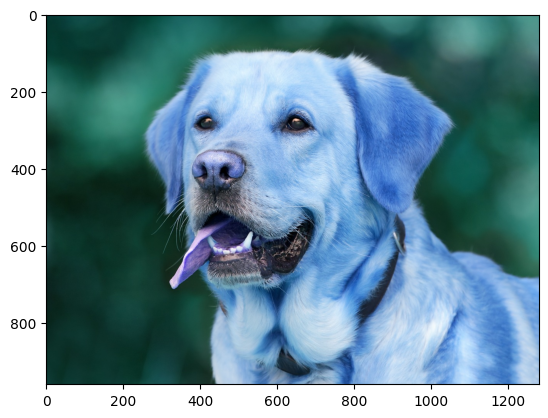

In [ ]:
dog_img = cv2.imread('/content/drive/MyDrive/Cats-v-Dogs-Classification/dog.jpg')
plt.imshow(dog_img);

In [ ]:
dog_img =  cv2.resize(dog_img,(256,256))

In [ ]:
test_dog = dog_img.reshape((1, 256, 256, 3))

In [ ]:
clf.predict(test_dog)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


array([[1.]], dtype=float32)

# **Saving and Loading the CNN Model**

In [ ]:
clf.save("/content/drive/MyDrive/Cats-v-Dogs-Classification/Cats-vs-Dogs.keras")

In [ ]:
loaded_model = load_model("/content/drive/MyDrive/Cats-v-Dogs-Classification/Cats-vs-Dogs.keras")

/usr/local/lib/python3.10/dist-packages/keras/src/saving/saving_lib.py:576: UserWarning: Skipping variable loading for optimizer 'rmsprop', because it has 20 variables whereas the saved optimizer has 38 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


In [ ]:
loaded_model.predict(test_input)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 292ms/step


array([[0.28676134]], dtype=float32)

In [ ]:
loaded_model.predict(test_dog)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step


array([[1.]], dtype=float32)